# Part II - PISA Data
## by Ekaterina Kuznetsova






## Investigation Overview


>PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines:
> - how well students have learned the school curriculum,
> - how well prepared they are for life beyond school etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.gridspec import GridSpec

%matplotlib inline

sb.set(style='white')

In [2]:
import pandas as pd
df = pd.read_csv ('pisa_clean.csv')
df.sample(3)

,Country,Year Birth,Gender,Mother Home,Mother Job Status,Programming,Study Time With Parent,Parents Highest Education,Immigration Status,Wealth,Math_Mean,Reading_Mean,Science_Mean
426258,Singapore,1996,Male,Yes,"Other (e.g. home duties, retired)",Never or rarely,NaN,"ISCED 3A, ISCED 4",First-Generation,-0.29,608.74748,570.24488,625.08392
57274,Brazil,1996,Female,Yes,Working full-time <for pay>,Never or rarely,1.0,"ISCED 3A, ISCED 4",Native,-3.91,353.80122,207.00116,315.87094
68369,Brazil,1996,Male,No,Working full-time <for pay>,NaN,1.0,ISCED 2,Native,-2.63,280.34740,207.28452,283.97986


In [3]:
# replace values in 
df['Mother Job Status'].replace({'Working full-time <for pay> ' : 'full-time',
                                     'Other (e.g. home duties, retired) ' : 'other', 
                                     'Working part-time <for pay>' : 'part-time', 
                                     'Not working, but looking for a job ' : 'now unemployed'}, inplace=True)

### Destribution of Maths, Reading and Science scores

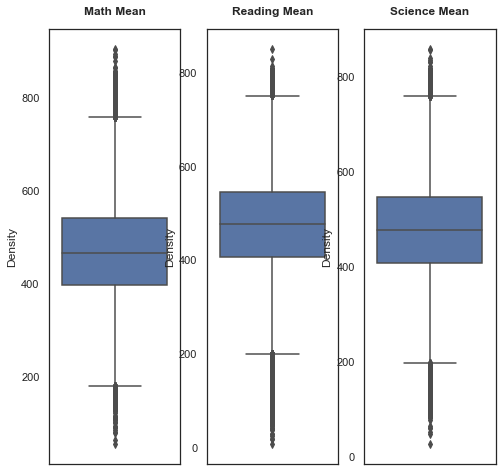

In [4]:
# which show the relationship between  mean scores and density

plt.figure(figsize=(8,8))
plt.subplot(1, 3, 1)
sb.boxplot(y=df['Math_Mean'])
plt.title('Math Mean', y = 1.02,fontweight="heavy")
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sb.boxplot(y=df['Reading_Mean'])
plt.title('Reading Mean', y = 1.02,fontweight="heavy")
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sb.boxplot(y=df['Science_Mean'])
plt.title('Science Mean', y = 1.02,fontweight="heavy")
plt.ylabel('Density');

- Reading Mean is obviously higher then Science and Mathematik Mean
- Most of students have scores in the range between 350 and 650.
- All 3 Scores are normally distributed
- Mean of all distributions near to 500

### Scatteplot between Wealth Index and Mathematic score

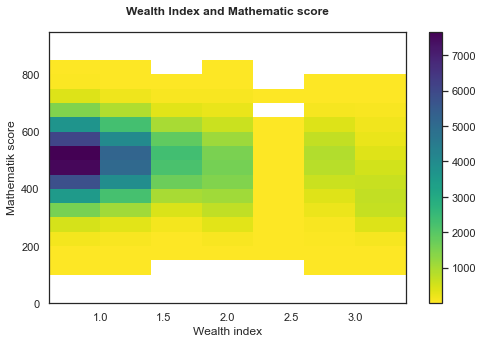

In [5]:
# correlation plot as color map
# between Wealth Index and Mathematic score

plt.figure(figsize = [8, 5])

def scatterplot():
  # data setup
  bins_x = np.arange(0.6, df['Wealth'].max()+0.4, 0.4)
  bins_y = np.arange(0, df['Math_Mean'].max()+50, 50)
  plt.hist2d(data = df, x = 'Wealth', y = 'Math_Mean',
             bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
  plt.colorbar()
  plt.xlabel('Wealth index')
  plt.ylabel('Mathematik score');
  plt.title('Wealth Index and Mathematic score', y = 1.04,fontweight="heavy");

scatterplot()       

- Below to see how wealth of family affect math scores.
- Obtained plots show us normal distributon and most of scores in the middle.

### Bar chart between Programming and Gender

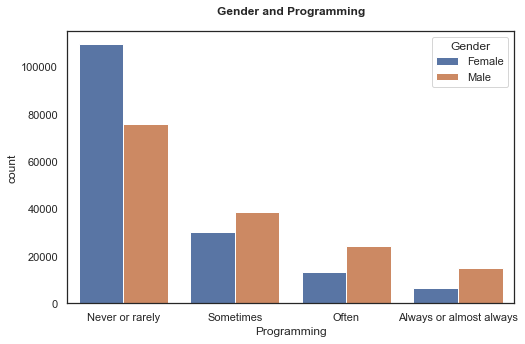

In [6]:
#plot the bar chart
plt.figure(figsize = [8, 5])
plt.title('Gender and Programming', y = 1.04,fontweight="heavy")
sb.countplot(data =df, x = 'Programming', hue = 'Gender');

- most of kids is not programming at home
- those of them who programming boys and geeks guys (who programming always)
- boys (who programming always) approximately in three times more then girls.


### Influence work of mother on Math grades

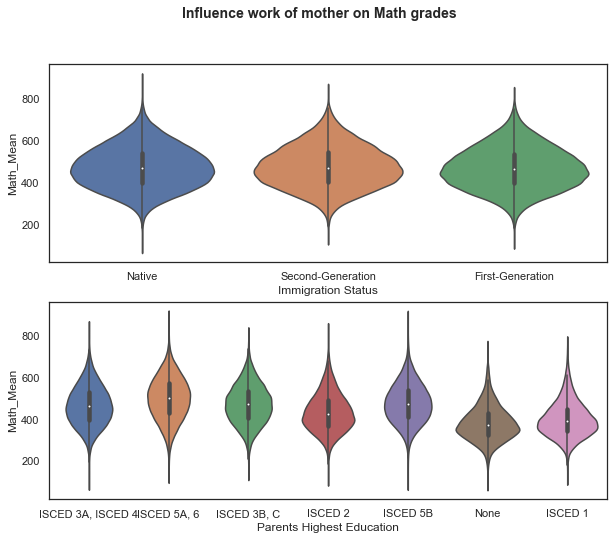

In [7]:
mother = ['Mother Job Status','Mother Home']
categoric= ['Immigration Status','Parents Highest Education']

fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])
plt.suptitle('Influence work of mother on Math grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= df, x= var, y = 'Math_Mean', ax= ax[i])

 - Grades in Math significant higher by them whose mother at home
 - And children full-time working mother has better grades then 
 - those whose mother unemployed or working part-time. Suddenly.

### Scores per Gender in Countries

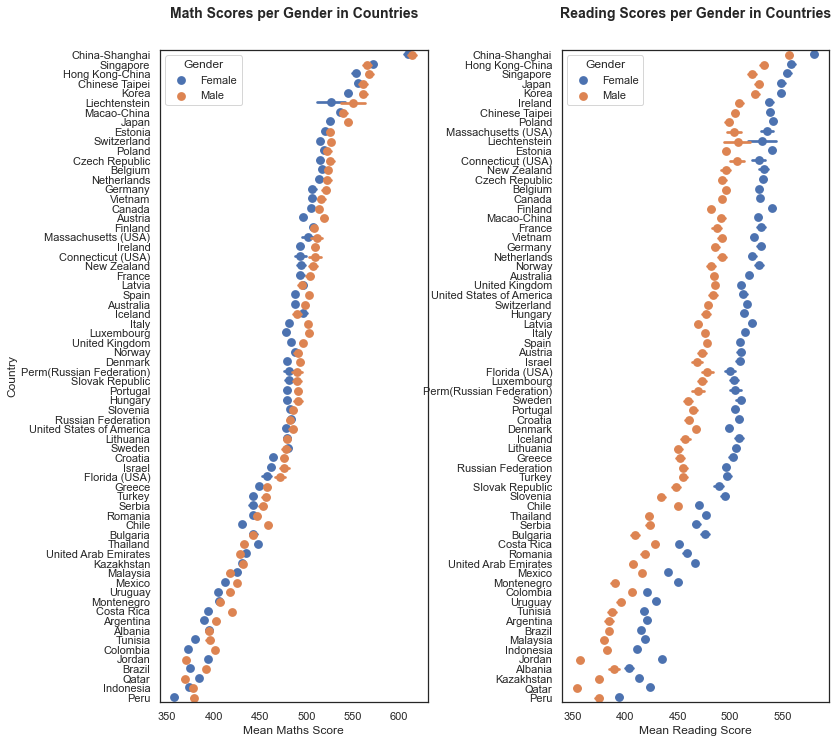

In [8]:
# using pointplot subplots, plot each country against the mean scores, with gender in 'hue' 
math_order = df.groupby('Country')['Math_Mean'].mean().sort_values(ascending = False).index
read_order = df.groupby('Country')['Reading_Mean'].mean().sort_values(ascending = False).index

#plot
plt.figure(figsize = [12, 12])
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,2,1)
ax = sb.pointplot(data = df, x= 'Math_Mean', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = math_order)
plt.ylabel('Country')
plt.xlabel('Mean Maths Score');
plt.title('Math Scores per Gender in Countries', y = 1.04, fontsize=14,fontweight="heavy");

plt.subplot(1,2,2)
ax = sb.pointplot(data = df, x= 'Reading_Mean', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = read_order)
plt.ylabel('')
plt.xlabel('Mean Reading Score');
plt.title('Reading Scores per Gender in Countries', y = 1.04, fontsize=14,fontweight="heavy");

- Girls in all countries have better notes in reading then boys.
- In Mathematic this difference is not so obviosly and in most of countries they have better notes. 
- Just in some countries like Jordan, Thailand and Quatar. 
- in these countries Mathematic Score are at the end of the list of all countries. 
- The Leaders is China, Singapore, Korea.

### Dependency immigration and parents education on Sciense grades

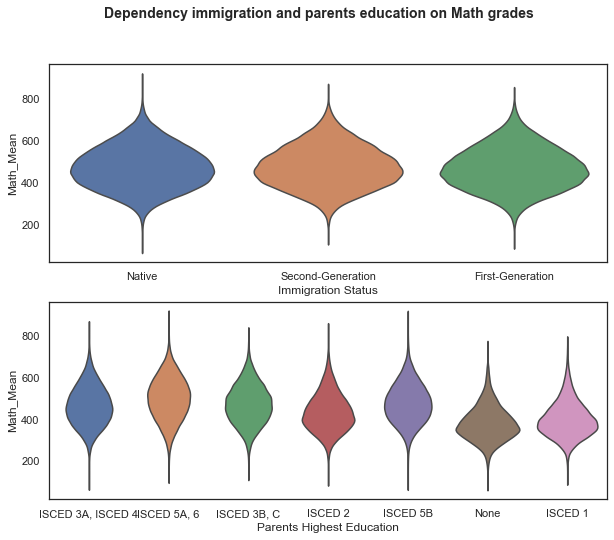

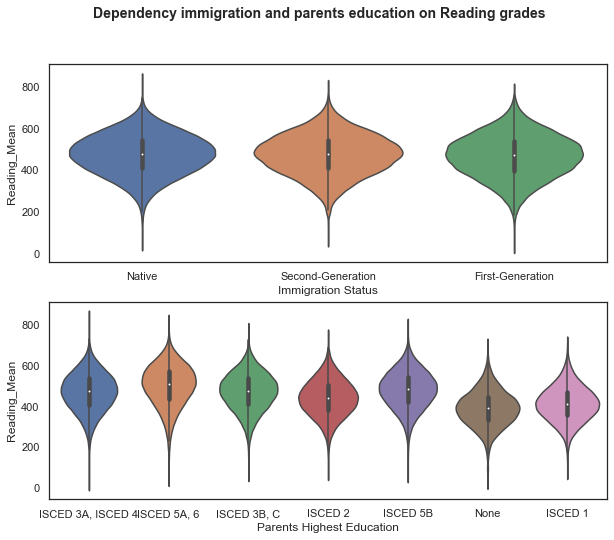

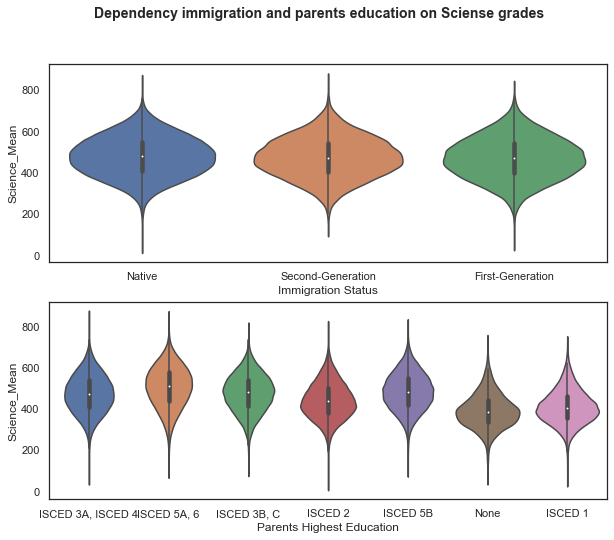

In [9]:
fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])
plt.suptitle('Dependency immigration and parents education on Math grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= df, x= var, y = 'Math_Mean', ax= ax[i], inner=None)
fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])

plt.suptitle('Dependency immigration and parents education on Reading grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= df, x= var, y = 'Reading_Mean', ax= ax[i])  
    
fig , ax= plt.subplots(ncols= 1, nrows = 2, figsize=[10,8])   
plt.suptitle('Dependency immigration and parents education on Sciense grades', fontsize=14,fontweight="heavy")
for i in range(len(categoric)):
    var = categoric[i]
    sb.violinplot(data= df, x= var, y = 'Science_Mean', ax= ax[i])

__From the violin plots of all scores obviosly:__
- 1. Tthe higher the education of the parents, then better assessment of their children
- that most evident in math and sciense
- 2. Immigration status has just a little impact on the notes

### The influence of mom at home on grades

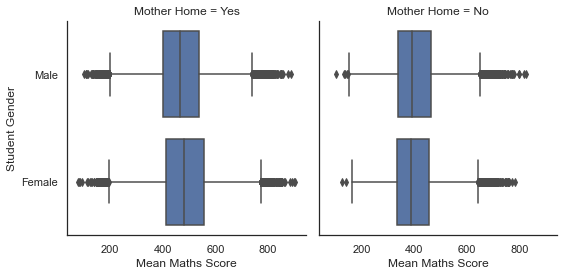

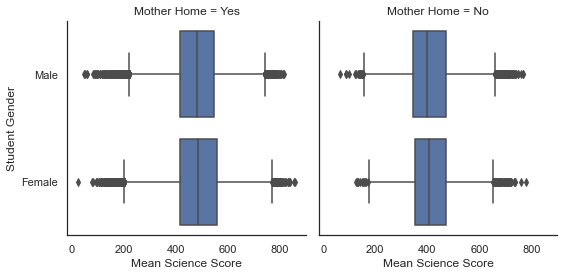

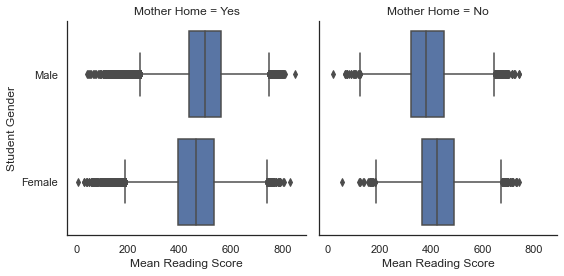

In [10]:
# FacetGrid boxplots when mother at home for each of the three mean score types

import warnings
warnings.filterwarnings("ignore")

g = sb.FacetGrid(data = df, col = 'Mother Home', height =4)
g.map(sb.boxplot, 'Math_Mean','Gender')
g.set_ylabels('Student Gender')
g.set_xlabels('Mean Maths Score')

g = sb.FacetGrid(data = df, col = 'Mother Home', height =4)
g.map(sb.boxplot, 'Science_Mean','Gender')
g.set_ylabels('Student Gender')
g.set_xlabels('Mean Science Score')

g = sb.FacetGrid(data = df, col = 'Mother Home', height =4)
g.map(sb.boxplot,'Reading_Mean','Gender' )
g.set_ylabels('Student Gender')
g.set_xlabels('Mean Reading Score');


- Grades of those whose mother at home are much higher.
- Especially by boys and reading grades

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

> jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.5.0"
> !jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt